<a href="https://colab.research.google.com/github/moebqr/Meta-LSTM-Prediction/blob/main/Meta_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Model for Meta Stock Price Prediction
## Based on Meta Stock Price Data from 2013/01/01 to 2024/01/01

Installing the necessary libraries

In [ ]:
!pip install yfinance tensorflow

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

## Load Meta stock price data

In [3]:
stock_symbol = 'META'
start_date = '2013-01-01'
end_date = '2024-01-01'
data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


## Preprocess the data

In [4]:
data = data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

## Creating training and testing datasets

In [6]:
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60:, :]

## Creating the dataset

In [7]:
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Create the testing dataset

In [8]:
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Build the LSTM Model

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

## Compile the model

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Train the model

In [11]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2155/2155 [==============================] - 76s 33ms/step - loss: 0.0014


## Make Predictions

In [12]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 2s 17ms/step


## Plot the results

<ipython-input-13-8ec88faa450b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


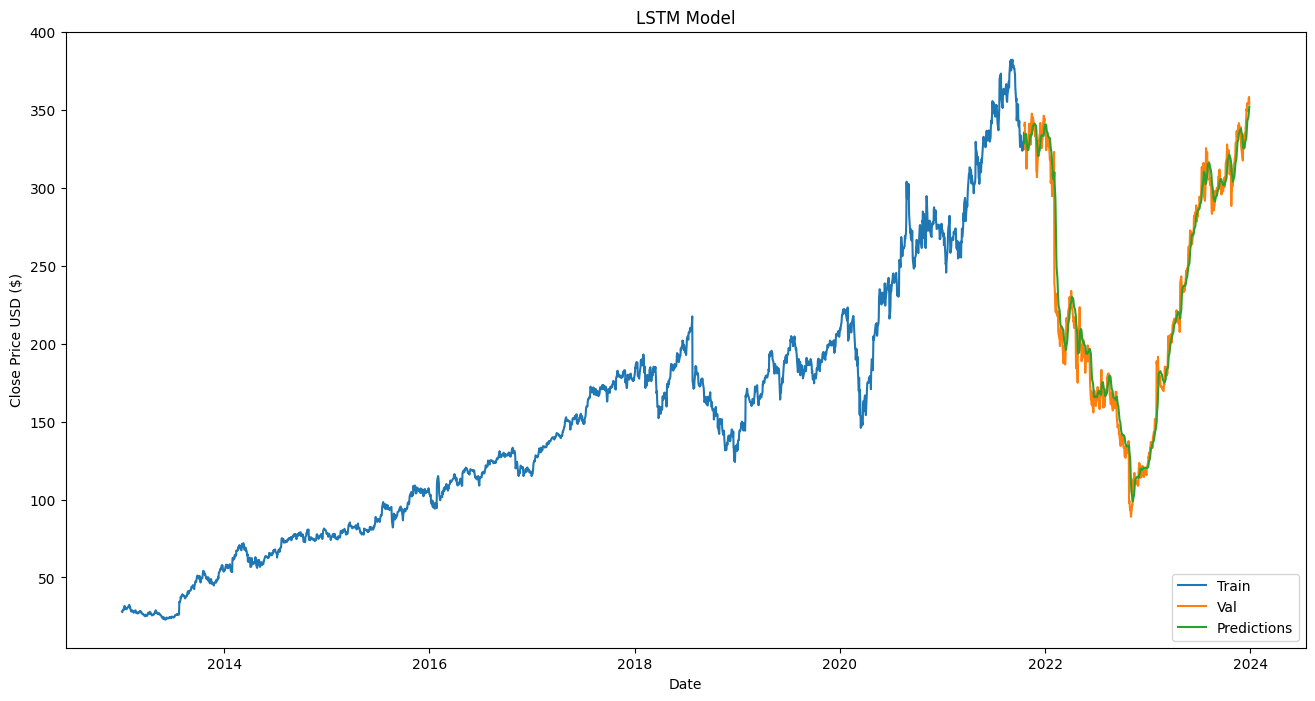

In [13]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()